In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [284]:
# Load the training and test datasets
df_train = pd.read_csv('/content/drive/MyDrive/ISI/project/stats/credit_score/Preprocessed_Missing_dataset.csv')
# df_test = pd.read_csv('/content/drive/MyDrive/ISI/project/stats/credit_score/test.csv')

df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,22 Years and 2 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [285]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [286]:
# Add an identifier to split later
# df_train['is_train'] = 1
# df_test['is_train'] = 0

# Combine the datasets
# df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
df = df_train.copy()

In [287]:
for col in df.columns:
    print(f"Column: {col} ({df[col].nunique()} unique values)")
    print(df[col].unique())
    print("-" * 50)

Column: ID (100000 unique values)
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
--------------------------------------------------
Column: Customer_ID (12500 unique values)
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
--------------------------------------------------
Column: Month (8 unique values)
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
--------------------------------------------------
Column: Name (10139 unique values)
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
--------------------------------------------------
Column: Age (43 unique values)
[23 28 34 54 55 21 31 33 30 24 44 45 40 41 32 35 36 39 37 20 46 26 42 19
 48 38 43 22 16 18 15 27 25 14 17 47 53 56 29 49 51 50 52]
--------------------------------------------------
Column: SSN (12500 unique values)
['821-00-0265' '004-07-5839' '486-85-3974' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
-------

In [288]:
# Basic info
df.info()

# Basic statistics
df.describe()  # includes categorical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.303370,50505.123449,4199.890282,5.368800,22.47443,72.466040,3.532880,21.092680,10.505943,5.778590,1426.220376,32.285173,1563.673641,189.722364,403.120320
std,10.764915,38299.422093,3188.480516,2.593248,129.05741,466.422621,2.446356,14.826122,6.632173,3.861341,1155.129026,5.116875,8515.389108,193.936757,214.014558
min,14.000000,7005.930000,303.645417,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,4.462837,5.013080,0.007760
25%,24.000000,19342.972500,1626.761667,3.000000,4.00000,8.000000,2.000000,10.000000,5.460000,3.000000,566.072500,28.052567,44.720548,70.374459,270.189030
50%,33.000000,36999.705000,3096.836667,5.000000,5.00000,13.000000,3.000000,18.000000,9.420000,5.000000,1166.155000,32.305784,90.725478,125.912586,337.114461
75%,42.000000,71683.470000,5964.883333,7.000000,7.00000,20.000000,5.000000,28.000000,14.850000,8.000000,1945.962500,36.496663,209.033260,229.576196,471.570652
max,56.000000,179987.280000,15204.633333,11.000000,1499.00000,5797.000000,9.000000,67.000000,36.970000,17.000000,4998.070000,50.000000,82163.000000,1977.326102,1602.040519


In [289]:
# Total missing values per column
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [290]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Fill numerical NaNs with median
for col in numerical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

In [291]:
import re

def clean_numbers(text):
    if pd.isna(text):
        return np.nan
    # Extract the first valid number (handles negatives/decimals)
    match = re.search(r"-?\d+\.?\d*", str(text))
    return float(match.group()) if match else np.nan

# Apply to numeric columns
numeric_cols = [
    'Age', 'Annual_Income', 'Num_of_Loan',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Outstanding_Debt','Amount_invested_monthly', 'Monthly_Balance'
]
for col in numeric_cols:
    df[col] = df[col].apply(clean_numbers)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert anything non-numeric to NaN
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [292]:
# # List of columns to clean and convert
# numeric_columns = [
#     'Age', 'Annual_Income', 'Num_of_Loan',
#     'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
#     'Outstanding_Debt','Amount_invested_monthly', 'Monthly_Balance'
# ]

# # Apply median imputation and convert to numeric
# for col in numeric_columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert anything non-numeric to NaN
#     median_value = df[col].median()
#     df[col] = df[col].fillna(median_value)  # Fill NaN with median


In [293]:
df.replace(['-', '--', '-----', 'NaN', 'nan', 'N/A', 'n/a'], pd.NA, inplace=True)

In [294]:
df['Occupation'] = df['Occupation'].replace('_______', 'Others')

In [295]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace({'!@9#%_Missing': 'Missing'})

In [296]:
import re

categorical_columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Step 1: Clean specific issues

# Replace '-' in Credit_Mix with mode
df['Credit_Mix'] = df['Credit_Mix'].replace('_', df['Credit_Mix'].mode()[0])

# Replace 'NM' in Payment_of_Min_Amount with 'No'
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', 'No')

# Replace invalid Payment_Behaviour values (non-alphanumeric + underscore, hyphen, space allowed)
valid_pattern = re.compile(r'^[\w\s-]+$')
pb_mode = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(
    lambda x: x if isinstance(x, str) and valid_pattern.match(x) else pb_mode
)

# Step 2: Fill remaining NaNs in categorical columns with their mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 3: Map Credit Score to ordinal values
credit_score_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
df['Credit_Score'] = df['Credit_Score'].map(credit_score_mapping)

# Step 4: One-hot encode the categorical columns (keep originals)
df_encoded = pd.get_dummies(df[categorical_columns], prefix=categorical_columns, drop_first=True).astype(int)

# Step 5: Merge encoded columns back
df = pd.concat([df, df_encoded], axis=1)


In [297]:
import numpy as np

def convert_to_months(text):
    try:
        if isinstance(text, str):
            parts = text.split(' ')
            years = int(parts[0].replace('Years', '').strip())
            months = int(parts[3].replace('Months', '').strip())
            return years * 12 + months
    except:
        return np.nan


In [298]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

# Now you can safely convert to float
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)

# Fill remaining NAs with median
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].median())


In [299]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0])

In [300]:
df[df['Num_of_Loan']==1]['Type_of_Loan'].value_counts()

,count
Type_of_Loan,
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
Payday Loan,1200
Mortgage Loan,1176
Auto Loan,1152
Home Equity Loan,1136


In [301]:
# Step 1: Get unique loan types (from rows where only one loan exists)
loan_type_counts = df[df['Num_of_Loan'] == 1]['Type_of_Loan'].value_counts()
loan_types = loan_type_counts.index.tolist()

# Step 2: Create empty list to store new row vectors
loan_type_vectors = []

# Step 3: Loop through each row and create count vector
for loan_string in df['Type_of_Loan']:
    # Initialize count vector with 0s
    count_vector = [0] * len(loan_types)

    # Handle possible NaNs
    if pd.isnull(loan_string):
        loan_type_vectors.append(count_vector)
        continue

    # Split loan types by comma (assuming multiple types are comma-separated)
    loans_in_row = [loan.strip() for loan in loan_string.split(',')]

    # Count each loan type's occurrence
    for i, loan_type in enumerate(loan_types):
        count_vector[i] = loans_in_row.count(loan_type)

    # Append this row's count vector
    loan_type_vectors.append(count_vector)

# Step 4: Convert to DataFrame
loan_type_df = pd.DataFrame(loan_type_vectors, columns=[f"Loan_{lt}" for lt in loan_types])

# Step 5: Concatenate with original DataFrame (optional)
df = pd.concat([df, loan_type_df], axis=1)



In [302]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_Behaviour_Low_spent_Small_value_payments,Loan_Not Specified,Loan_Credit-Builder Loan,Loan_Personal Loan,Loan_Debt Consolidation Loan,Loan_Student Loan,Loan_Payday Loan,Loan_Mortgage Loan,Loan_Auto Loan,Loan_Home Equity Loan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,0,0,1,1,0,0,0,0,1,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,0,0,1,1,0,0,0,0,1,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,0,0,1,1,0,0,0,0,1,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,1,0,1,1,0,0,0,0,1,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,0,0,1,1,0,0,0,0,1,0


In [303]:
# Double-check for any remaining missing values
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [304]:
df[df['Loan_Personal Loan']>1].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_Behaviour_Low_spent_Small_value_payments,Loan_Not Specified,Loan_Credit-Builder Loan,Loan_Personal Loan,Loan_Debt Consolidation Loan,Loan_Student Loan,Loan_Payday Loan,Loan_Mortgage Loan,Loan_Auto Loan,Loan_Home Equity Loan
264,0x178e,CUS_0x4004,January,Carlosj,43.0,679-26-6464,Writer,58317.0,4664.75,8,...,0,0,0,2,0,0,0,2,0,1
265,0x178f,CUS_0x4004,February,Carlosj,43.0,679-26-6464,Writer,58317.0,4664.75,8,...,0,0,0,2,0,0,0,2,0,1
266,0x1790,CUS_0x4004,March,Carlosj,44.0,679-26-6464,Writer,58317.0,4664.75,8,...,0,0,0,2,0,0,0,2,0,1
267,0x1791,CUS_0x4004,April,Carlosj,44.0,679-26-6464,Writer,58317.0,4664.75,8,...,0,0,0,2,0,0,0,2,0,1
268,0x1792,CUS_0x4004,May,Carlosj,44.0,679-26-6464,Writer,58317.0,4664.75,8,...,0,0,0,2,0,0,0,2,0,1


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 59 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   ID                                                  100000 non-null  object 
 1   Customer_ID                                         100000 non-null  object 
 2   Month                                               100000 non-null  object 
 3   Name                                                100000 non-null  object 
 4   Age                                                 100000 non-null  float64
 5   SSN                                                 100000 non-null  object 
 6   Occupation                                          100000 non-null  object 
 7   Annual_Income                                       100000 non-null  float64
 8   Monthly_Inhand_Salary                               100000 non-nu

In [306]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_Low_spent_Small_value_payments,Loan_Not Specified,Loan_Credit-Builder Loan,Loan_Personal Loan,Loan_Debt Consolidation Loan,Loan_Student Loan,Loan_Payday Loan,Loan_Mortgage Loan,Loan_Auto Loan,Loan_Home Equity Loan
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.303370,50505.123449,4199.890282,5.368800,22.47443,72.466040,3.532880,21.092680,29.738370,10.505943,...,0.277670,0.35032,0.357600,0.339280,0.344320,0.343280,0.357440,0.342640,0.336800,0.344560
std,10.764915,38299.422093,3188.480516,2.593248,129.05741,466.422621,2.446356,14.826122,218.017612,6.632173,...,0.447852,0.60339,0.615894,0.588432,0.599473,0.593028,0.612993,0.597295,0.593978,0.599668
min,14.000000,7005.930000,303.645417,0.000000,0.00000,1.000000,0.000000,0.000000,-3.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,19342.972500,1626.761667,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.460000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,36999.705000,3096.836667,5.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.420000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,71683.470000,5964.883333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.850000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,56.000000,179987.280000,15204.633333,11.000000,1499.00000,5797.000000,9.000000,67.000000,4397.000000,36.970000,...,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000


In [307]:
# 1. Split the dataset
# df_train_clean = df[df['is_train'] == 1].copy()
# df_test_clean = df[df['is_train'] == 0].copy()

df_train_clean = df.copy()
df_test_clean = None

# 2. Drop unnecessary columns
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'is_train']
# df_train_clean.drop(columns=columns_to_drop, axis=1, inplace=True)
# df_test_clean.drop(columns=columns_to_drop, axis=1, inplace=True)

numeric_cols = df_train_clean.select_dtypes(include=['int64', 'float64']).columns
# df_train_clean = df_train_clean[(df_train_clean[numeric_cols] >= 0).all(axis=1)]
# df_train_clean = df_train_clean[(df_train_clean['Age'] >= 18) & (df_train_clean['Age'] <= 60)]

In [308]:
df_train_clean.shape

(100000, 59)

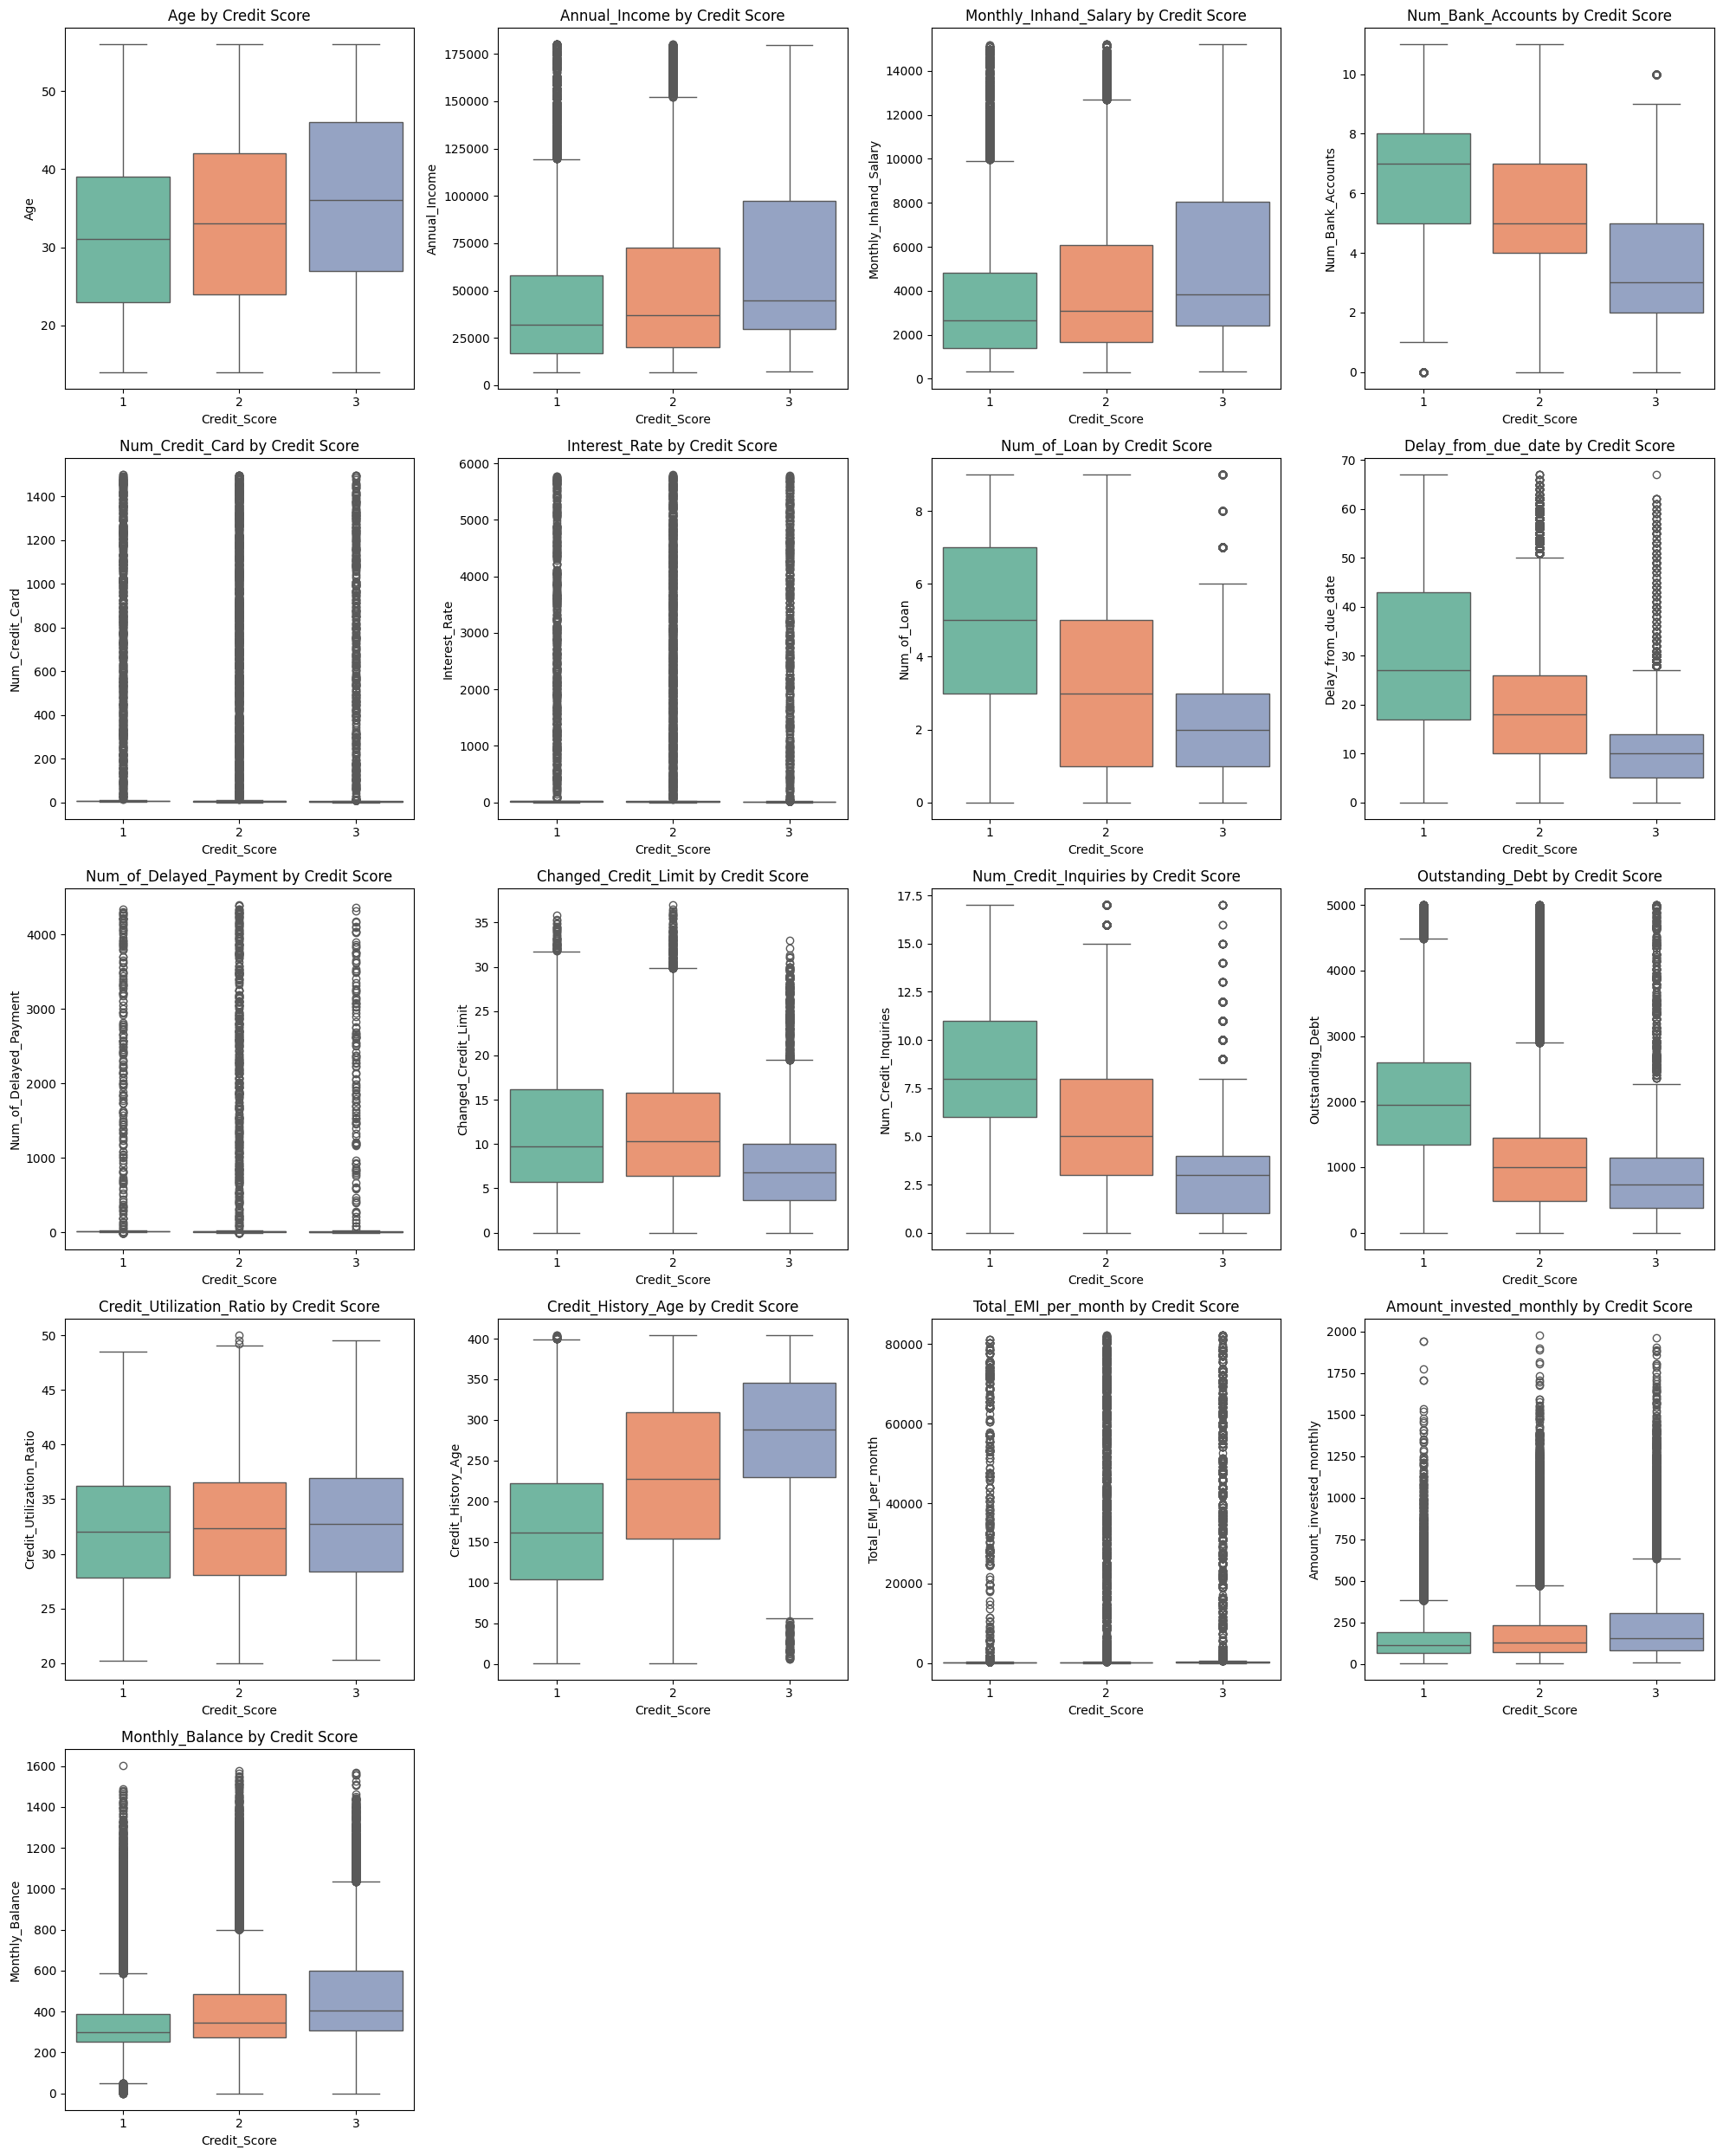

In [309]:
# Step 1: Define all original categorical columns
categorical_columns = [
    'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
    'Payment_Behaviour', 'Month', 'Type_of_Loan'
]

# Step 2: Identify all one-hot encoded columns
one_hot_cols = []
for cat in categorical_columns:
    if cat == "Type_of_Loan":
        one_hot_cols.extend([col for col in df_train_clean.columns if col.startswith("Loan_")])
    else:
        one_hot_cols.extend([col for col in df_train_clean.columns if col.startswith(f"{cat}_")])

# Step 3: Select only numerical columns (excluding one-hot encoded + original categorical + Credit_Score)
num_cols = [
    col for col in df_train_clean.select_dtypes(include=['int64', 'float64']).columns
    if col not in one_hot_cols and col not in categorical_columns and col != 'Credit_Score'
]

# Step 4: Plot boxplots for each numerical feature
num_rows = int(np.ceil(len(num_cols) / 4))  # 4 plots per row

plt.figure(figsize=(20, 5 * num_rows))  # Adjust height based on number of rows

for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(x='Credit_Score', y=col, hue='Credit_Score', data=df_train_clean, palette='Set2', legend=False)
    plt.title(f'{col} by Credit Score')

plt.tight_layout()
plt.show()

In [310]:
# Step 0: One-hot encode 'Month' and drop original categorical columns
df_cleaned = df_train_clean.copy()

# One-hot encode 'Month' (if not already done)
df_month_encoded = pd.get_dummies(df_cleaned['Month'], prefix='Month', drop_first=True)

# Merge encoded month
df_cleaned = pd.concat([df_cleaned, df_month_encoded], axis=1)

df_train_clean = df_cleaned.copy()

In [311]:
numeric_cols = df_train_clean.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = df_train_clean[col].quantile(0.25)
    Q3 = df_train_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(col +":  ",(df_train_clean[(df_train_clean[col] < lower_bound) | (df_train_clean[col] > upper_bound)].shape[0]/(df_train.shape[0]*1.0)))

Age:   0.0
Annual_Income:   0.02
Monthly_Inhand_Salary:   0.02014
Num_Bank_Accounts:   0.0
Num_Credit_Card:   0.02271
Interest_Rate:   0.02034
Num_of_Loan:   0.0
Delay_from_due_date:   0.04002
Num_of_Delayed_Payment:   0.00736
Changed_Credit_Limit:   0.00862
Num_Credit_Inquiries:   0.0077
Outstanding_Debt:   0.05272
Credit_Utilization_Ratio:   4e-05
Credit_History_Age:   0.0
Total_EMI_per_month:   0.1203
Amount_invested_monthly:   0.08139
Monthly_Balance:   0.07628
Credit_Score:   0.0
Occupation_Architect:   0.06824
Occupation_Developer:   0.0672
Occupation_Doctor:   0.06568
Occupation_Engineer:   0.06864
Occupation_Entrepreneur:   0.06648
Occupation_Journalist:   0.06536
Occupation_Lawyer:   0.07096
Occupation_Manager:   0.06432
Occupation_Mechanic:   0.06776
Occupation_Media_Manager:   0.0672
Occupation_Musician:   0.06352
Occupation_Scientist:   0.06744
Occupation_Teacher:   0.06672
Occupation_Writer:   0.06304
Credit_Mix_Good:   0.0
Credit_Mix_Standard:   0.0
Payment_of_Min_Amount_

In [312]:
numeric_cols = ['Interest_Rate','Num_Credit_Card','Monthly_Balance','Delay_from_due_date','Total_EMI_per_month','Num_of_Delayed_Payment','Outstanding_Debt','Annual_Income','Monthly_Inhand_Salary','Num_Credit_Inquiries',]
for col in numeric_cols:
    Q1 = df_train_clean[col].quantile(0.25)
    Q3 = df_train_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_train_clean = df_train_clean[(df_train_clean[col] >= lower_bound) & (df_train_clean[col] <= upper_bound)]

In [313]:
df_train_clean.shape

(70992, 66)

In [314]:
df_train_clean.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_Low_spent_Small_value_payments,Loan_Not Specified,Loan_Credit-Builder Loan,Loan_Personal Loan,Loan_Debt Consolidation Loan,Loan_Student Loan,Loan_Payday Loan,Loan_Mortgage Loan,Loan_Auto Loan,Loan_Home Equity Loan
count,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,...,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000
mean,32.967264,41310.540214,3435.533186,5.528707,5.602519,15.104040,3.907807,20.905680,13.744774,10.739324,...,0.303584,0.344828,0.352166,0.334432,0.332812,0.334615,0.351138,0.334277,0.328558,0.333812
std,10.670167,27825.830514,2318.683577,2.529530,2.062851,8.703824,2.150012,13.570481,5.876608,6.511107,...,0.459808,0.597882,0.611139,0.585109,0.590235,0.584148,0.608510,0.588402,0.582375,0.590183
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,18289.680000,1539.466667,4.000000,4.000000,8.000000,2.000000,10.000000,10.000000,5.850000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,33642.070000,2799.830833,6.000000,5.000000,14.000000,4.000000,19.000000,14.000000,9.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,60340.020000,5000.266667,8.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.190000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,56.000000,127313.400000,10290.685000,11.000000,11.000000,34.000000,9.000000,57.000000,28.000000,36.970000,...,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000


In [315]:
# from scipy.stats import skew
# import numpy as np

# # Identify numeric columns
# numeric_cols = df_train_clean.select_dtypes(include=['int64', 'float64']).columns

# # Apply log1p to highly skewed columns
# for col in numeric_cols:
#     col_skewness = skew(df_train_clean[col].dropna())
#     if abs(col_skewness) > 0.75:
#         # Shift values if there are 0 or negative values
#         min_val = min(df_train_clean[col].min(), df_test_clean[col].min())
#         shift = 1 - min_val if min_val <= 0 else 0
#         df_train_clean[col] = np.log1p(df_train_clean[col] + shift)
#         df_test_clean[col] = np.log1p(df_test_clean[col] + shift)


In [316]:
df_train_clean.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_Low_spent_Small_value_payments,Loan_Not Specified,Loan_Credit-Builder Loan,Loan_Personal Loan,Loan_Debt Consolidation Loan,Loan_Student Loan,Loan_Payday Loan,Loan_Mortgage Loan,Loan_Auto Loan,Loan_Home Equity Loan
count,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,...,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000,70992.000000
mean,32.967264,41310.540214,3435.533186,5.528707,5.602519,15.104040,3.907807,20.905680,13.744774,10.739324,...,0.303584,0.344828,0.352166,0.334432,0.332812,0.334615,0.351138,0.334277,0.328558,0.333812
std,10.670167,27825.830514,2318.683577,2.529530,2.062851,8.703824,2.150012,13.570481,5.876608,6.511107,...,0.459808,0.597882,0.611139,0.585109,0.590235,0.584148,0.608510,0.588402,0.582375,0.590183
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,18289.680000,1539.466667,4.000000,4.000000,8.000000,2.000000,10.000000,10.000000,5.850000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,33642.070000,2799.830833,6.000000,5.000000,14.000000,4.000000,19.000000,14.000000,9.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,60340.020000,5000.266667,8.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.190000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,56.000000,127313.400000,10290.685000,11.000000,11.000000,34.000000,9.000000,57.000000,28.000000,36.970000,...,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000


In [317]:
df_train_clean.shape

(70992, 66)

In [318]:
df_train_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Loan_Mortgage Loan,Loan_Auto Loan,Loan_Home Equity Loan,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,0,1,0,False,False,True,False,False,False,False
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,0,1,0,False,True,False,False,False,False,False
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,0,1,0,False,False,False,False,False,True,False
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,0,1,0,False,False,False,False,False,False,False
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,0,1,0,False,False,False,False,False,False,True


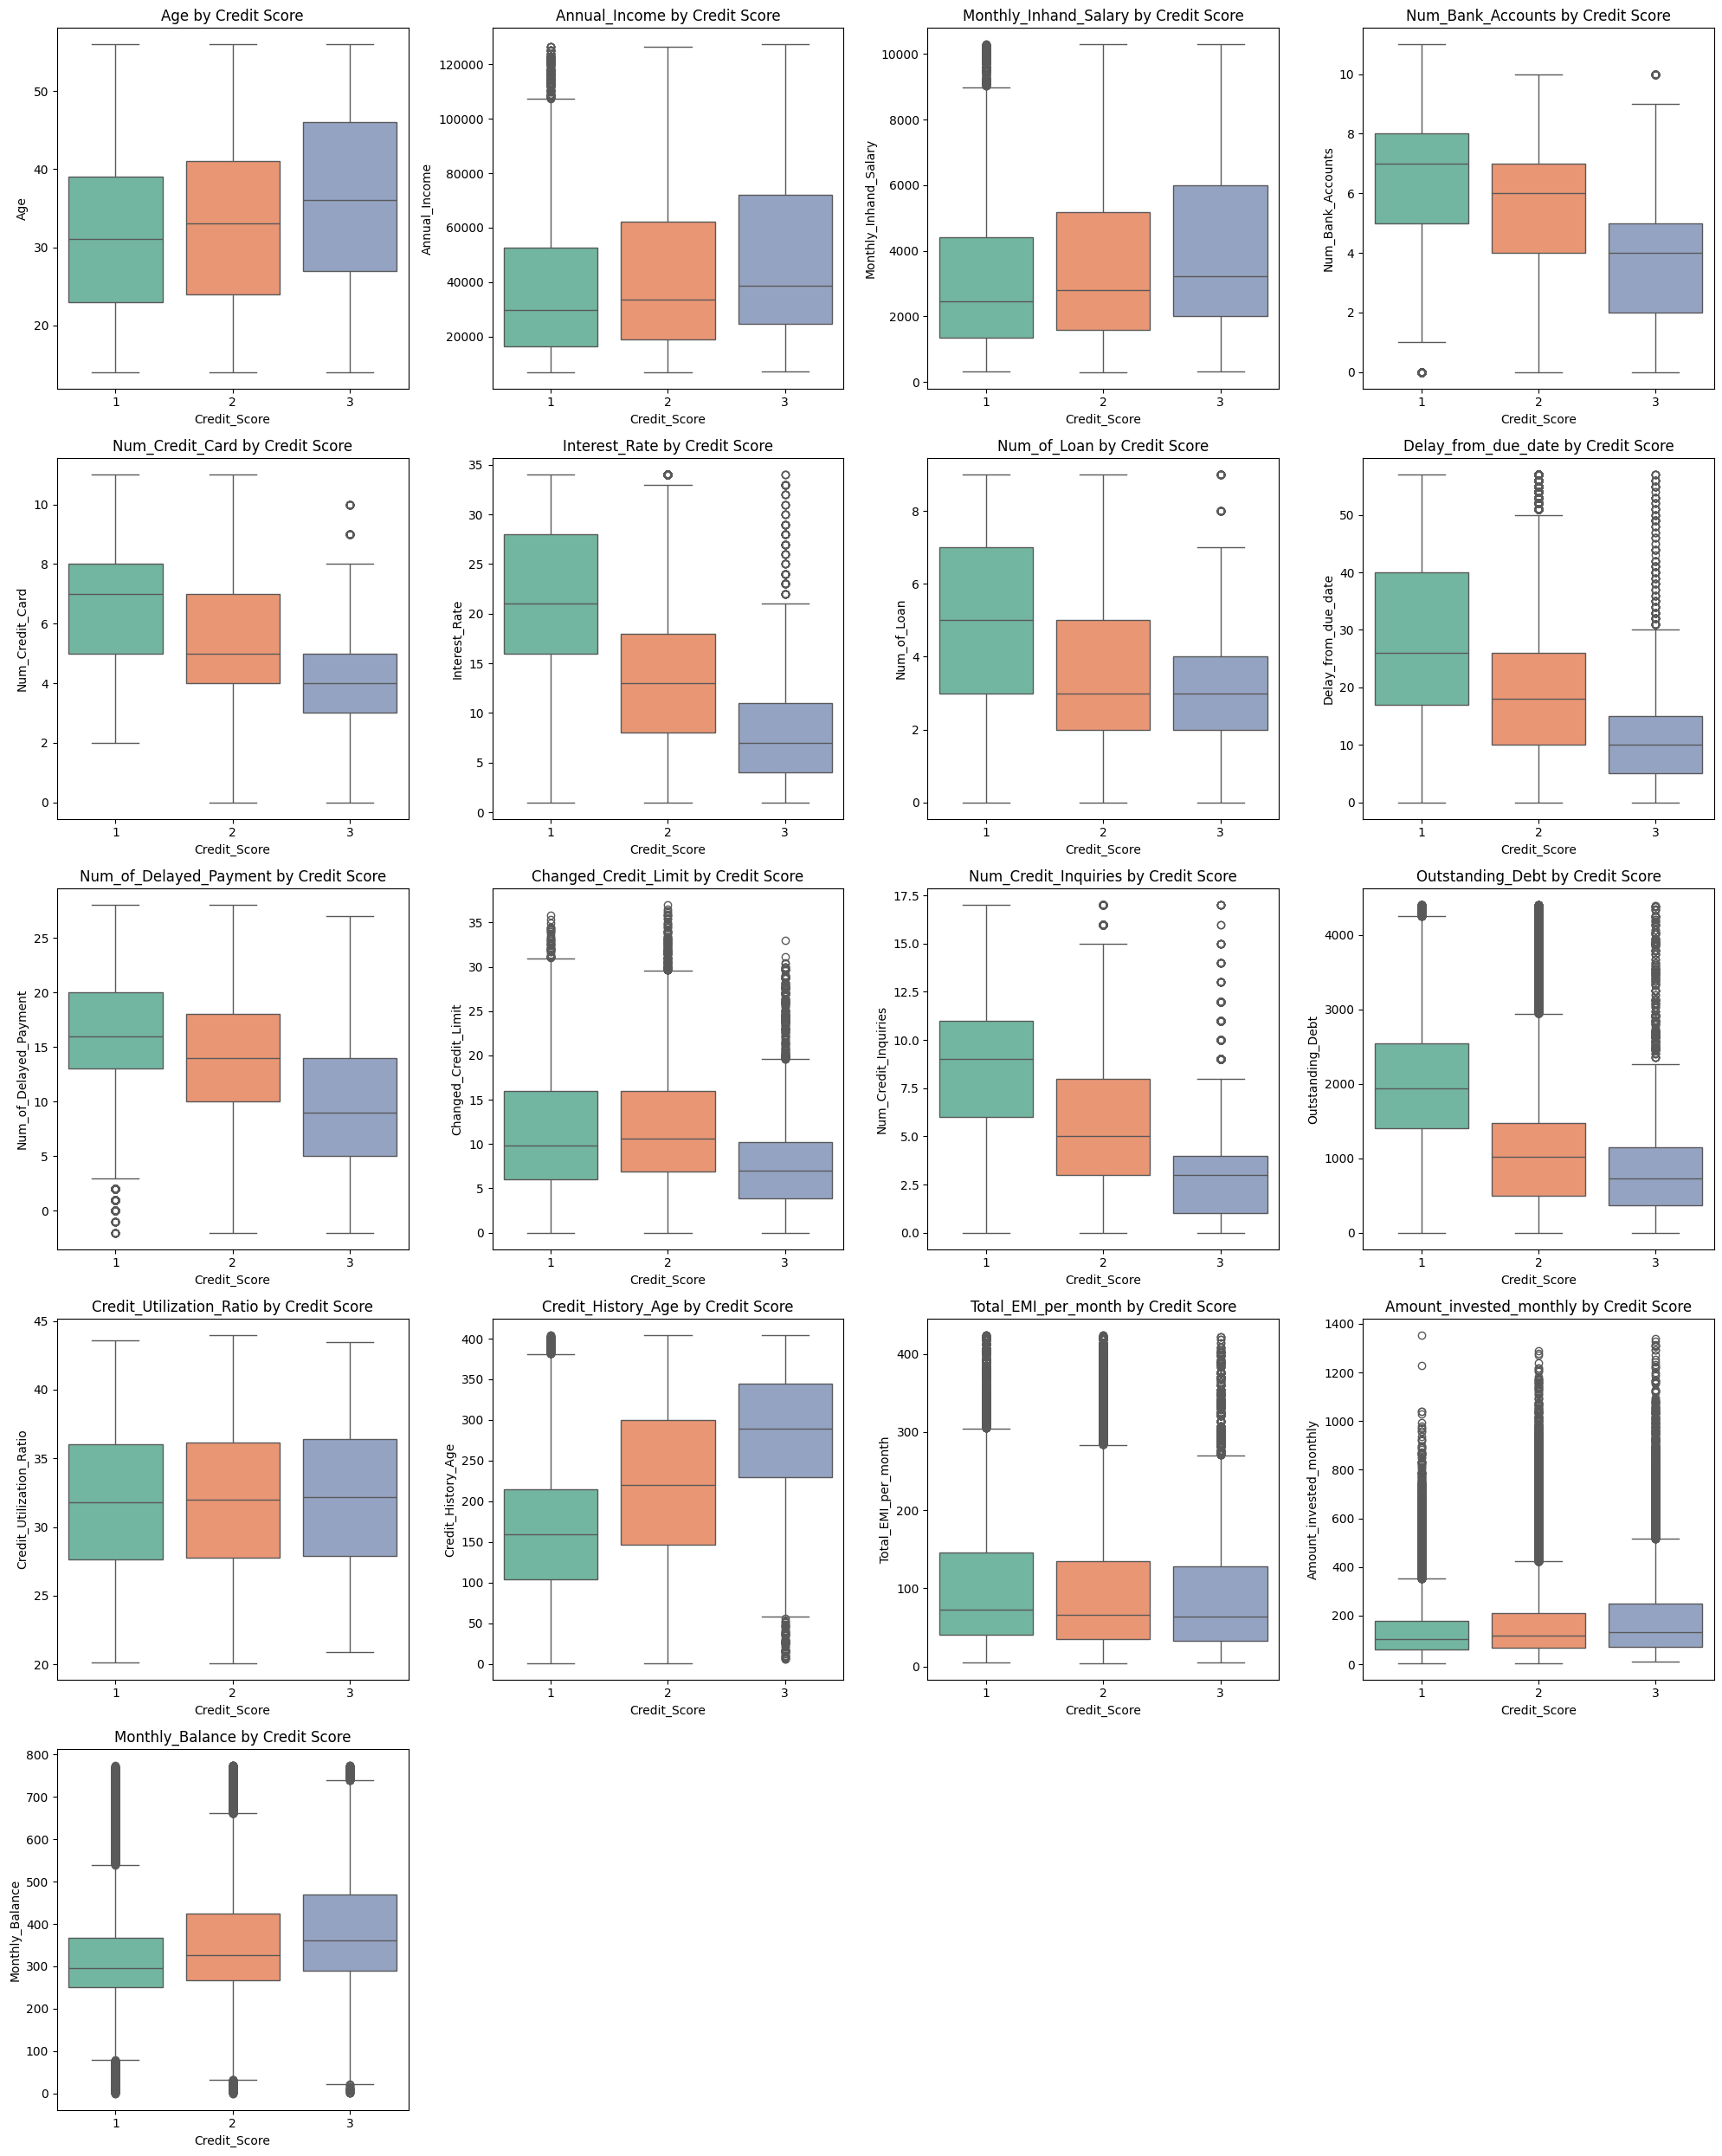

In [319]:
# Step 1: Define all original categorical columns
categorical_columns = [
    'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
    'Payment_Behaviour', 'Month', 'Type_of_Loan'
]

# Step 2: Identify all one-hot encoded columns
one_hot_cols = []
for cat in categorical_columns:
    if cat == "Type_of_Loan":
        one_hot_cols.extend([col for col in df_train_clean.columns if col.startswith("Loan_")])
    else:
        one_hot_cols.extend([col for col in df_train_clean.columns if col.startswith(f"{cat}_")])

# Step 3: Select only numerical columns (excluding one-hot encoded + original categorical + Credit_Score)
num_cols = [
    col for col in df_train_clean.select_dtypes(include=['int64', 'float64']).columns
    if col not in one_hot_cols and col not in categorical_columns and col != 'Credit_Score'
]

# Step 4: Plot boxplots for each numerical feature
num_rows = int(np.ceil(len(num_cols) / 4))  # 4 plots per row

plt.figure(figsize=(20, 5 * num_rows))  # Adjust height based on number of rows

for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(x='Credit_Score', y=col, hue='Credit_Score', data=df_train_clean, palette='Set2', legend=False)
    plt.title(f'{col} by Credit Score')

plt.tight_layout()
plt.show()

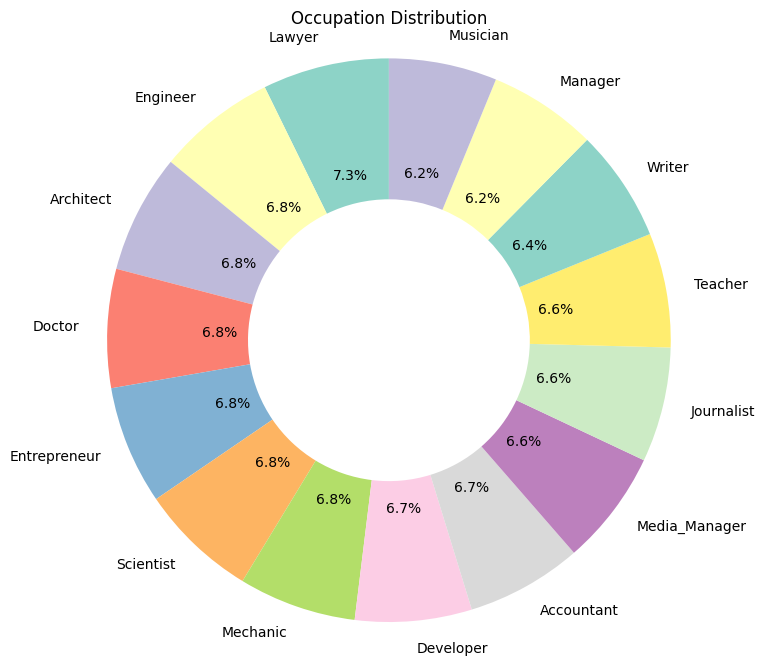

In [322]:
plt.figure(figsize=(8, 8))
plt.pie(df_train_clean["Occupation"].value_counts(),
        labels=df_train_clean["Occupation"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("Occupation Distribution")
plt.axis('equal')
plt.show()


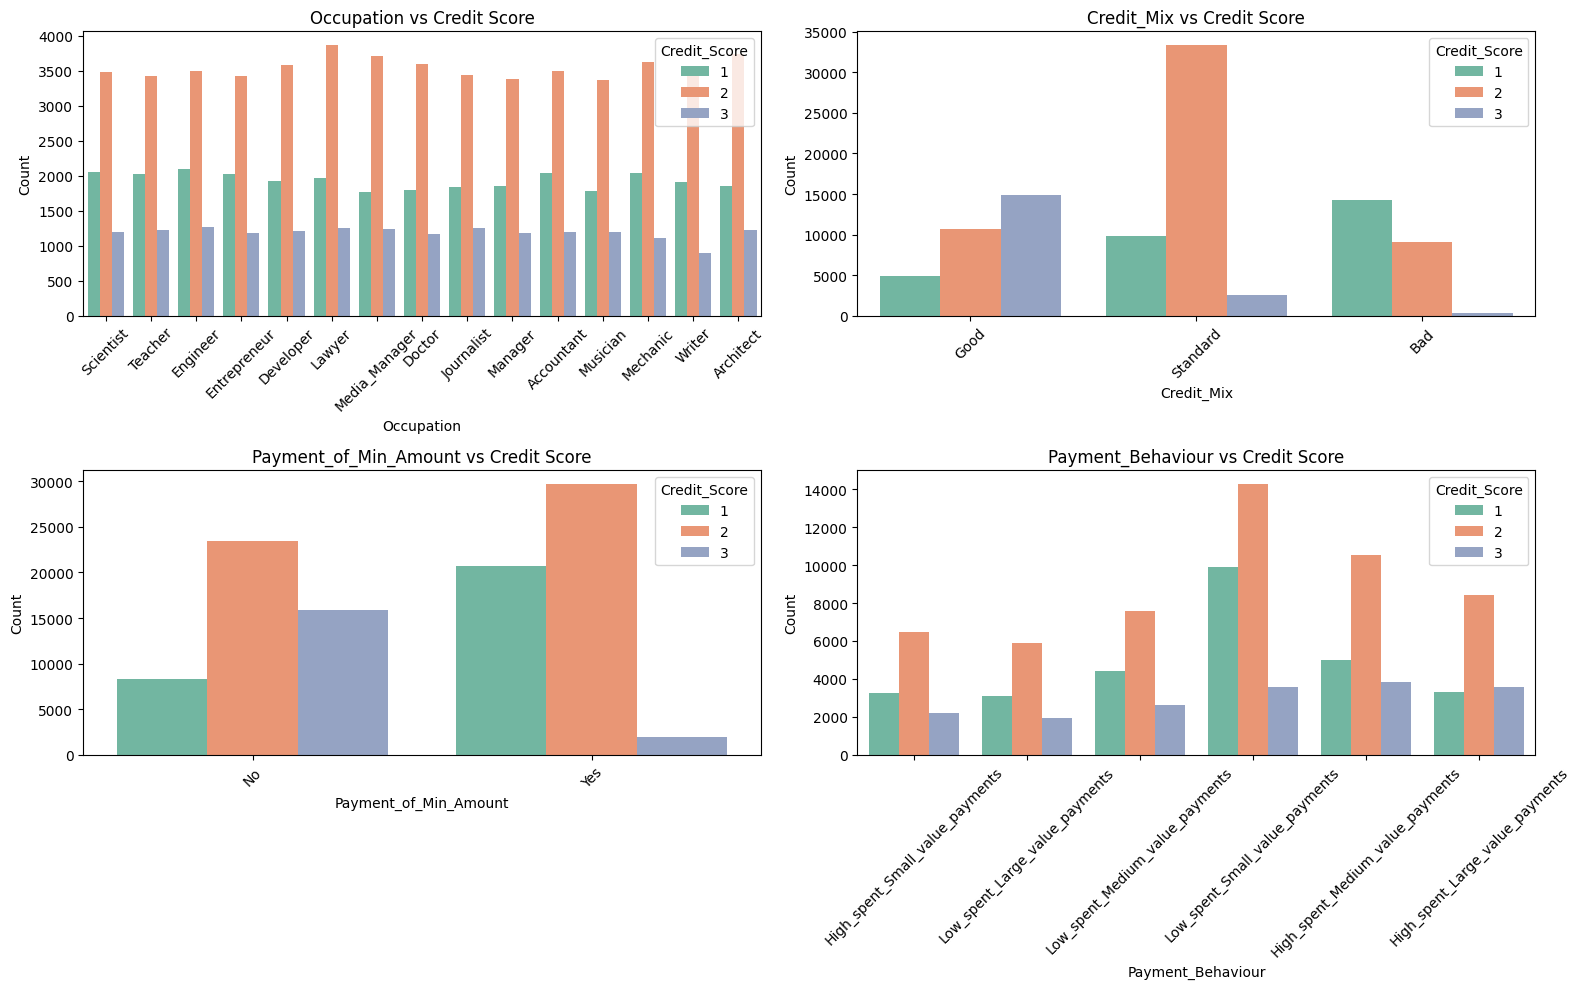

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the original columns for plotting
categorical_columns = [
    'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'
]

# Calculate rows and columns for subplots
num_cols = 2
num_rows = int(np.ceil(len(categorical_columns) / num_cols))

plt.figure(figsize=(16, 5 * num_rows))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col, hue='Credit_Score', palette='Set2')
    plt.title(f'{col} vs Credit Score')
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

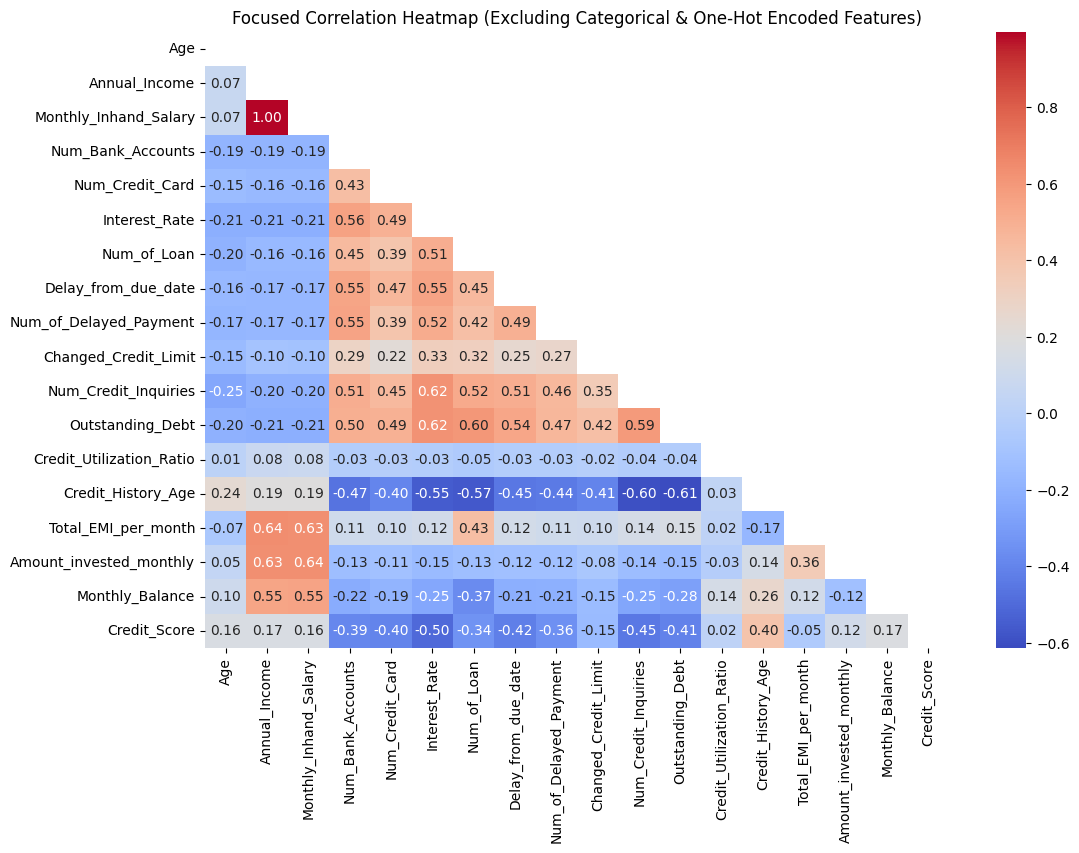

In [324]:
import numpy as np

# Step 1: Define original categorical columns
categorical_columns = [
    'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
    'Payment_Behaviour', 'Month', 'Type_of_Loan'
]

# Step 2: Identify one-hot encoded columns based on prefix
one_hot_cols = []
for cat in categorical_columns:
    if cat == "Type_of_Loan":
        one_hot_cols.extend([col for col in df_train_clean.columns if col.startswith("Loan_")])
    else:
        one_hot_cols.extend([col for col in df_train_clean.columns if col.startswith(f"{cat}_")])

# Step 3: Exclude all one-hot encoded and original categorical columns
num_cols = [
    col for col in df_train_clean.select_dtypes(include=['int64', 'float64']).columns
    if col not in one_hot_cols and col not in categorical_columns and col != 'Credit_Score'
]

# Step 4: Create correlation heatmap
selected_cols = num_cols + ['Credit_Score']

plt.figure(figsize=(12, 8))
corr = df_train_clean[selected_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Focused Correlation Heatmap (Excluding Categorical & One-Hot Encoded Features)')
plt.show()


In [325]:
# categorical_columns = [
#     'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour'
# ]

# # Identify numerical features (excluding Credit_Score and one-hot encoded columns)
# num_cols = [col for col in df_train_clean.select_dtypes(include=['int64','float64']).columns
#             if not col.startswith(tuple(categorical_columns)) and col != 'Credit_Score']

# # Get all one-hot encoded columns
# one_hot_cols = [col for col in df_train_clean.columns
#                 if any(col.startswith(cat) for cat in categorical_columns)]


# # Select top numerical features + some one-hot encoded features
# selected_cols = num_cols[:] + ['Credit_Score']

# plt.figure(figsize=(12, 8))
# corr = df_train_clean[selected_cols].corr()
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
#             mask=np.triu(np.ones_like(corr, dtype=bool)))
# plt.title('Focused Correlation Heatmap')
# plt.show()

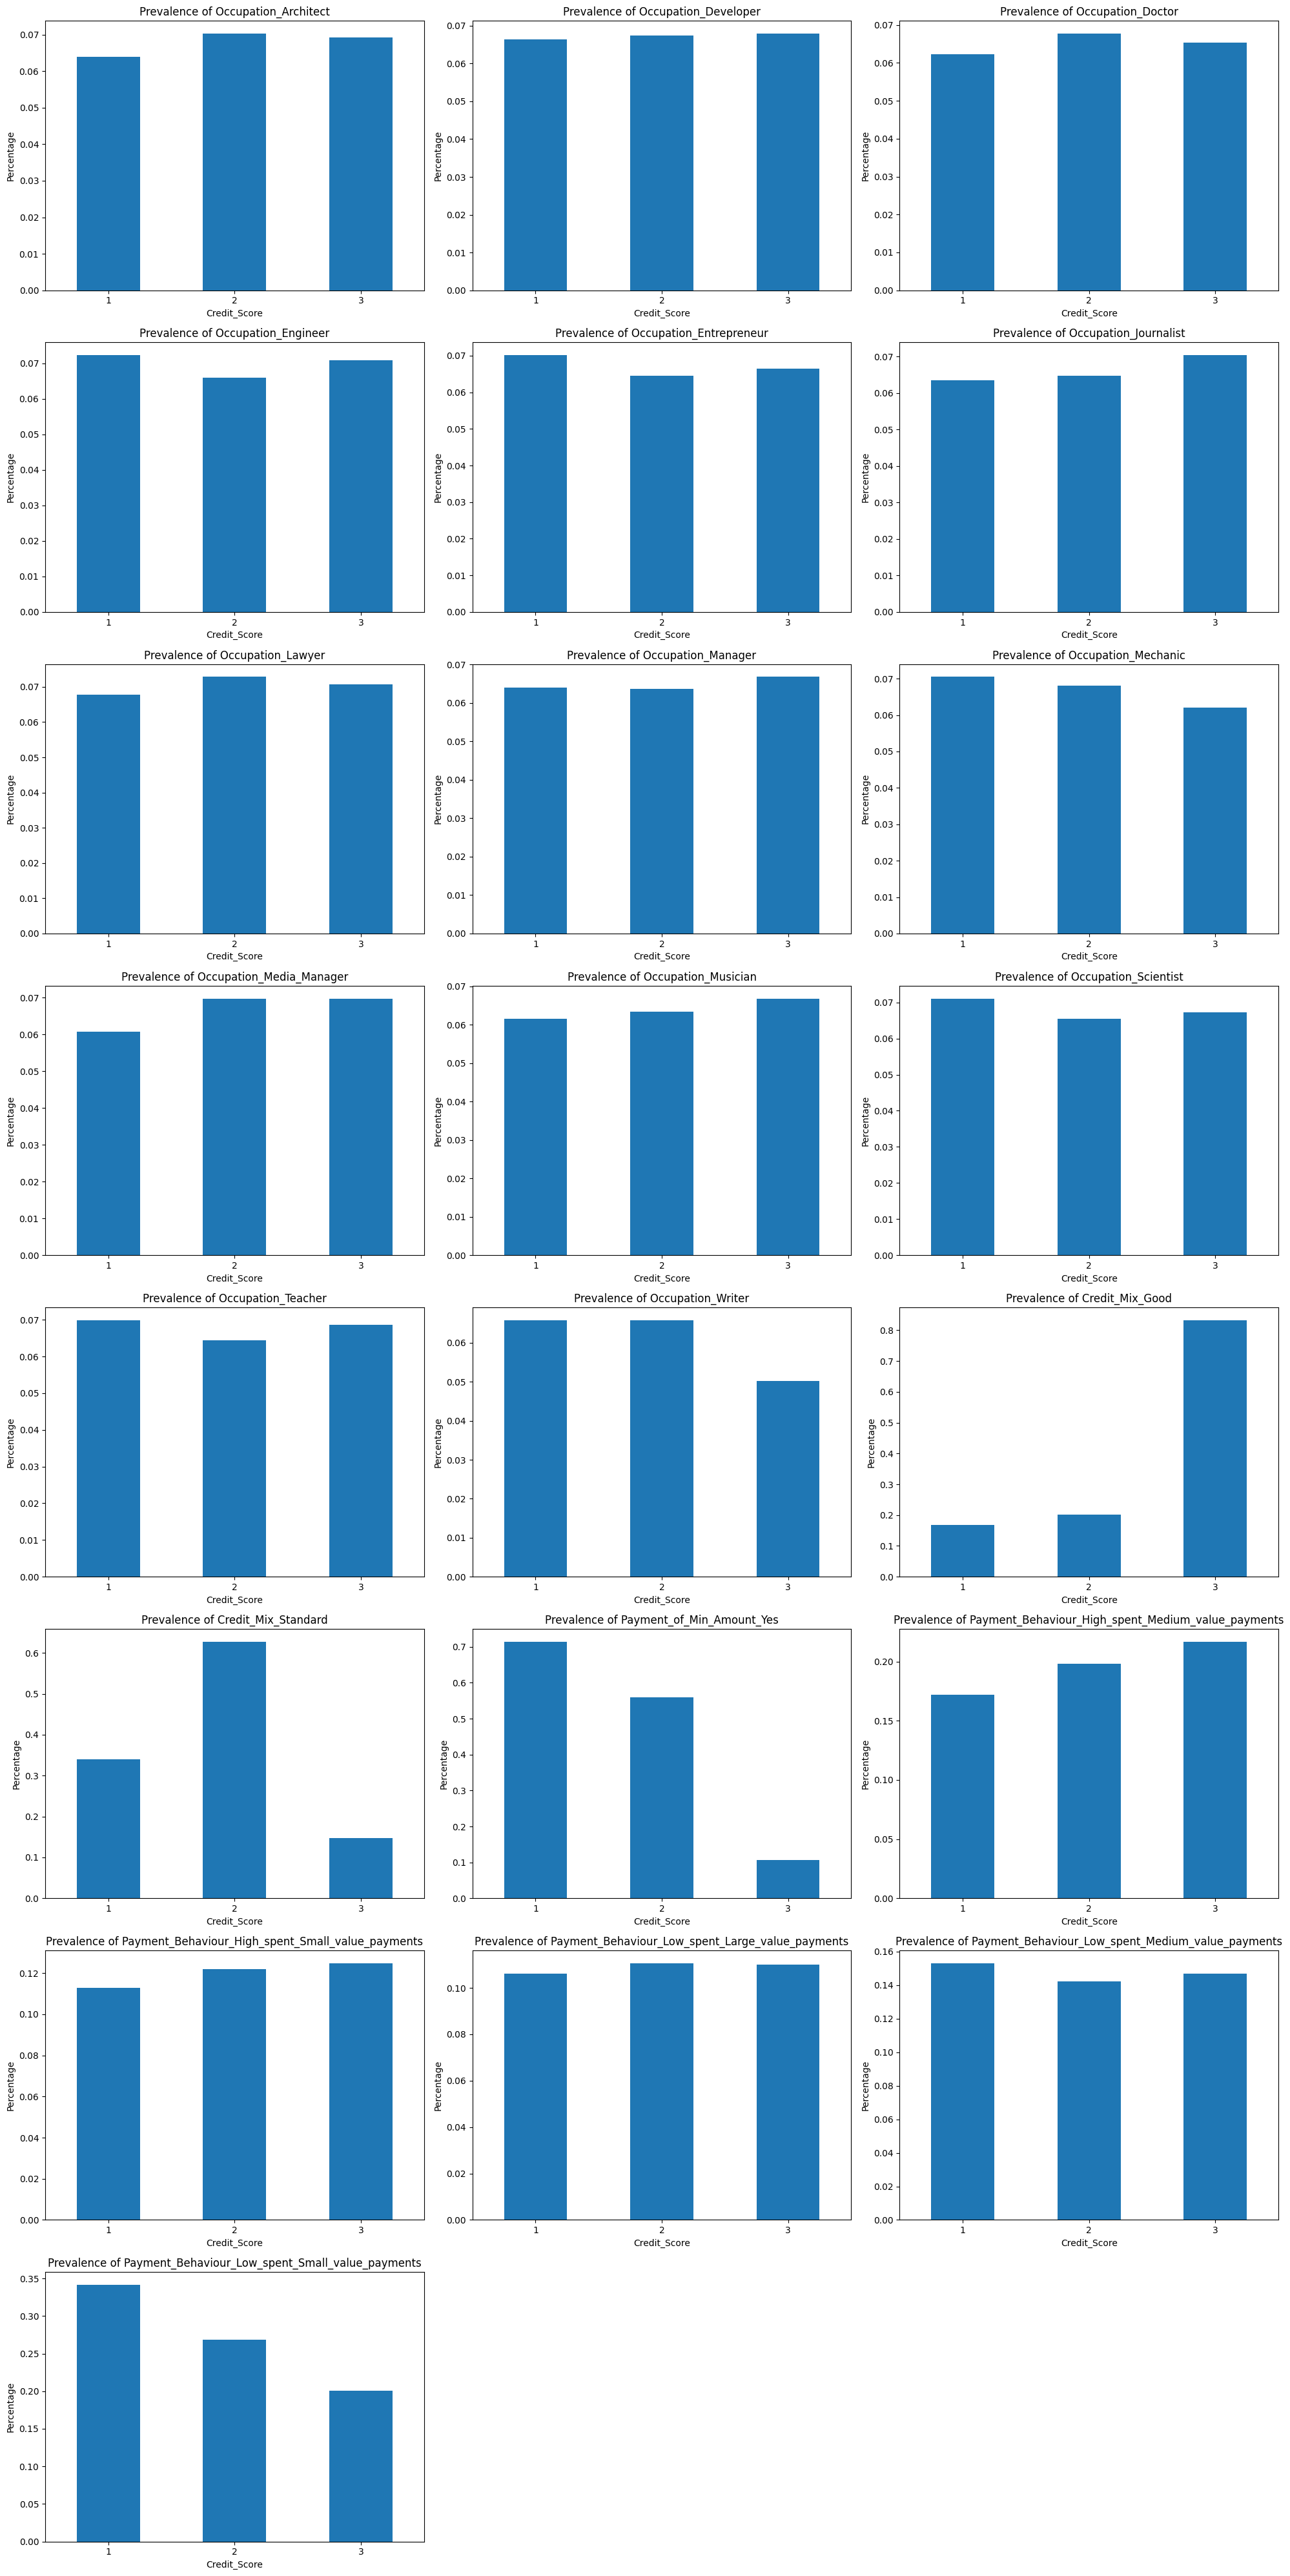

In [326]:
# List of one-hot encoded columns
one_hot_cols = df_encoded.columns.tolist()

# Plotting prevalence
num_cols = 3
num_rows = int(np.ceil(len(one_hot_cols) / num_cols))

plt.figure(figsize=(20, 5 * num_rows))
for i, col in enumerate(one_hot_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    df.groupby('Credit_Score')[col].mean().plot(kind='bar')  # df must have both 'Credit_Score' and one-hot columns
    plt.title(f'Prevalence of {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [327]:
# Drop original categorical columns
categorical_columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Month','Type_of_Loan']
df_cleaned = df_train_clean.drop(columns=categorical_columns)


# Step 2: Train-Test Split (80-20 split from balanced data)
X = df_cleaned.drop(columns=['Credit_Score'])
y = df_cleaned['Credit_Score']
X.head()
X.shape

(70992, 59)

<ipython-input-328-c3ae9bf2c469>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_class_count, random_state=42))



📊 Logistic Regression Evaluation Metrics:
              precision    recall  f1-score   support

        Poor       0.74      0.71      0.72      2234
    Standard       0.66      0.63      0.65      2235
        Good       0.75      0.81      0.78      2235

    accuracy                           0.72      6704
   macro avg       0.72      0.72      0.72      6704
weighted avg       0.72      0.72      0.72      6704



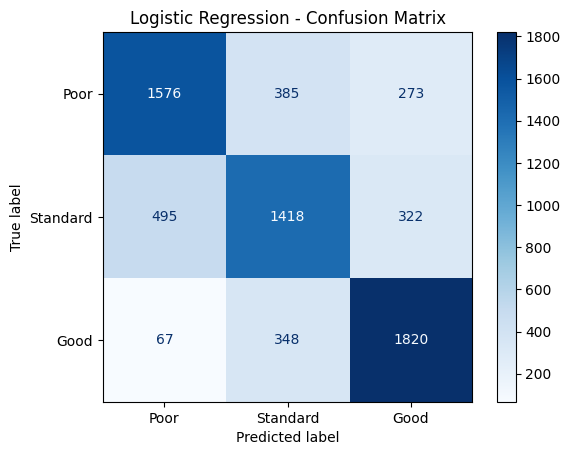


📊 Random Forest Evaluation Metrics:
              precision    recall  f1-score   support

        Poor       0.82      0.85      0.84      2234
    Standard       0.76      0.71      0.73      2235
        Good       0.84      0.87      0.85      2235

    accuracy                           0.81      6704
   macro avg       0.81      0.81      0.81      6704
weighted avg       0.81      0.81      0.81      6704



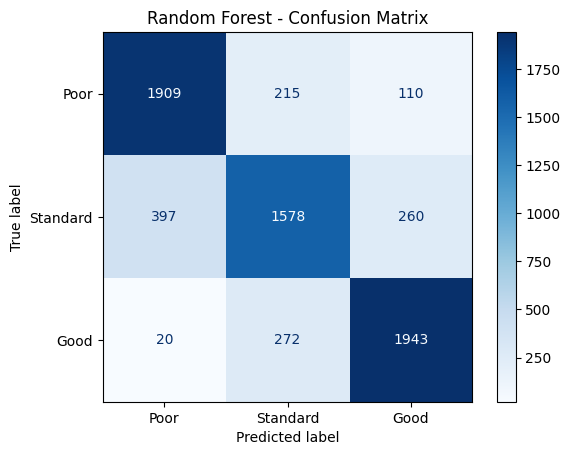

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:53:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 XGBoost Evaluation Metrics:
              precision    recall  f1-score   support

        Poor       0.81      0.82      0.81      2234
    Standard       0.75      0.68      0.71      2235
        Good       0.82      0.88      0.85      2235

    accuracy                           0.79      6704
   macro avg       0.79      0.79      0.79      6704
weighted avg       0.79      0.79      0.79      6704



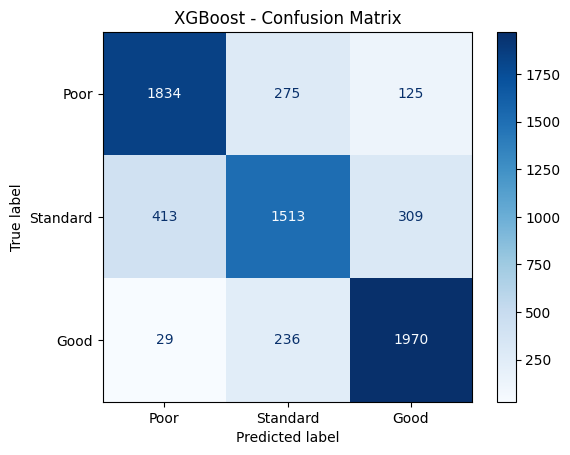


📈 Model Comparison:


,Accuracy,Precision,Recall,F1-Score
Random Forest,0.809964,0.808305,0.809964,0.808554
XGBoost,0.793109,0.790930,0.793109,0.791037
Logistic Regression,0.718079,0.716660,0.718079,0.716783


In [328]:
# Step 1: Group by 'Credit_Score' and sample equal data from each class
min_class_count = df_train_clean['Credit_Score'].value_counts().min()

df_balanced = (
     df_train_clean.groupby('Credit_Score')
     .apply(lambda x: x.sample(min_class_count, random_state=42))
     .reset_index(drop=True)
)

# Drop original categorical columns
categorical_columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Month','Type_of_Loan']
df_cleaned = df_balanced.drop(columns=categorical_columns)


# Step 2: Train-Test Split (80-20 split from balanced data)
X = df_cleaned.drop(columns=['Credit_Score'])
y = df_cleaned['Credit_Score']


# Convert all columns in X to numeric, replacing errors with NaN and then filling NaN with 0
# This will ensure that all columns are numeric for scaling
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# ----- Step 3: Feature scaling -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----- Step 4: Define models -----
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    # "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# ----- Step 5: Train, evaluate and plot -----
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
results = {}

for name, model in models.items():
    # Subtracting 1 from the target variable to start from 0 for XGBoost
    if name == "XGBoost":
        model.fit(X_train_scaled, y_train - 1)
        y_pred = model.predict(X_test_scaled) + 1  # Adding 1 back to predictions for evaluation
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    print(f"\n📊 {name} Evaluation Metrics:")
    print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

    # Save metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
    }

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poor', 'Standard', 'Good'])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# ----- Step 6: Compare model metrics -----
print("\n📈 Model Comparison:")
metrics_df = pd.DataFrame(results).T
display(metrics_df.sort_values("F1-Score", ascending=False))


In [329]:
# # Drop original categorical columns
# categorical_columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Month','Type_of_Loan']
# df_cleaned = df_cleaned.drop(columns=categorical_columns)

# # ----- Step 1: Feature-target split -----
# X = df_cleaned.drop(['Credit_Score'], axis=1)
# y = df_cleaned['Credit_Score']

# # ----- Convert all columns to numeric, replacing non-numeric values with NaN -----
# # This is the added line to fix the error
# X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# # ----- Step 2: Train-test split -----
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# # ----- Step 3: Feature scaling -----
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # ----- Step 4: Define models -----
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     # "SVM": SVC(probability=True, random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# }

# # ----- Step 5: Train, evaluate and plot -----
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# results = {}

# for name, model in models.items():
#     # Subtracting 1 from the target variable to start from 0 for XGBoost
#     if name == "XGBoost":
#         model.fit(X_train_scaled, y_train - 1)
#         y_pred = model.predict(X_test_scaled) + 1  # Adding 1 back to predictions for evaluation
#     else:
#         model.fit(X_train_scaled, y_train)
#         y_pred = model.predict(X_test_scaled)

#     print(f"\n📊 {name} Evaluation Metrics:")
#     print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

#     # Save metrics
#     results[name] = {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred, average='weighted'),
#         "Recall": recall_score(y_test, y_pred, average='weighted'),
#         "F1-Score": f1_score(y_test, y_pred, average='weighted'),
#     }

#     # Plot Confusion Matrix
#     cm = confusion_matrix(y_test, y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poor', 'Standard', 'Good'])
#     disp.plot(cmap='Blues')
#     plt.title(f"{name} - Confusion Matrix")
#     plt.show()

# # ----- Step 6: Compare model metrics -----
# print("\n📈 Model Comparison:")
# metrics_df = pd.DataFrame(results).T
# display(metrics_df.sort_values("F1-Score", ascending=False))